In [1]:
from fastai.vision.all import *
from ipywidgets import widgets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from zipfile import ZipFile

In [2]:
#with ZipFile("/content/drive/MyDrive/sertificat/3/pnevmoniya.zip") as zipObj:
#  zipObj.extractall("/content/drive/MyDrive/sertificat/3/")

In [9]:
#path
path = Path('/content/drive/MyDrive/sertificat/3/train')
# fls = get_image_files(path)
# failed = verify_images(path)

lungs = DataBlock(
    blocks =(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

#Dataloader

dls = lungs.dataloaders(path)

#datasetni tekshirish

#dls.train.show_batch(max_n=32, nrows=4)

#O'qitish (train)

learn = cnn_learner(dls, resnet34, metrics = accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 126MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.487285,0.214274,0.936721,02:15


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch,train_loss,valid_loss,accuracy,time
0,0.133833,0.162441,0.964525,02:10
1,0.098794,0.069154,0.974113,02:07
2,0.052764,0.097282,0.979866,02:11
3,0.026241,0.078837,0.980825,02:10


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


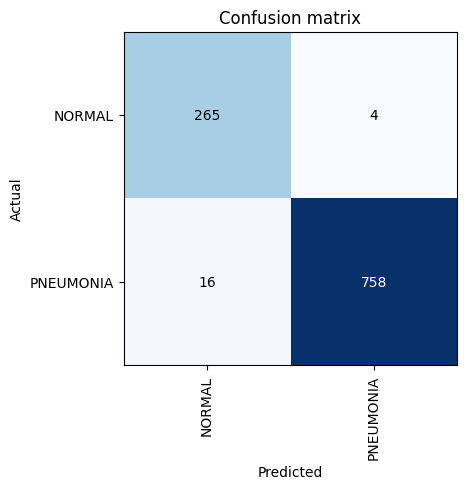

In [10]:
#tekshirish

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [11]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat:NORMAL
Ehtimollik: 100.0%


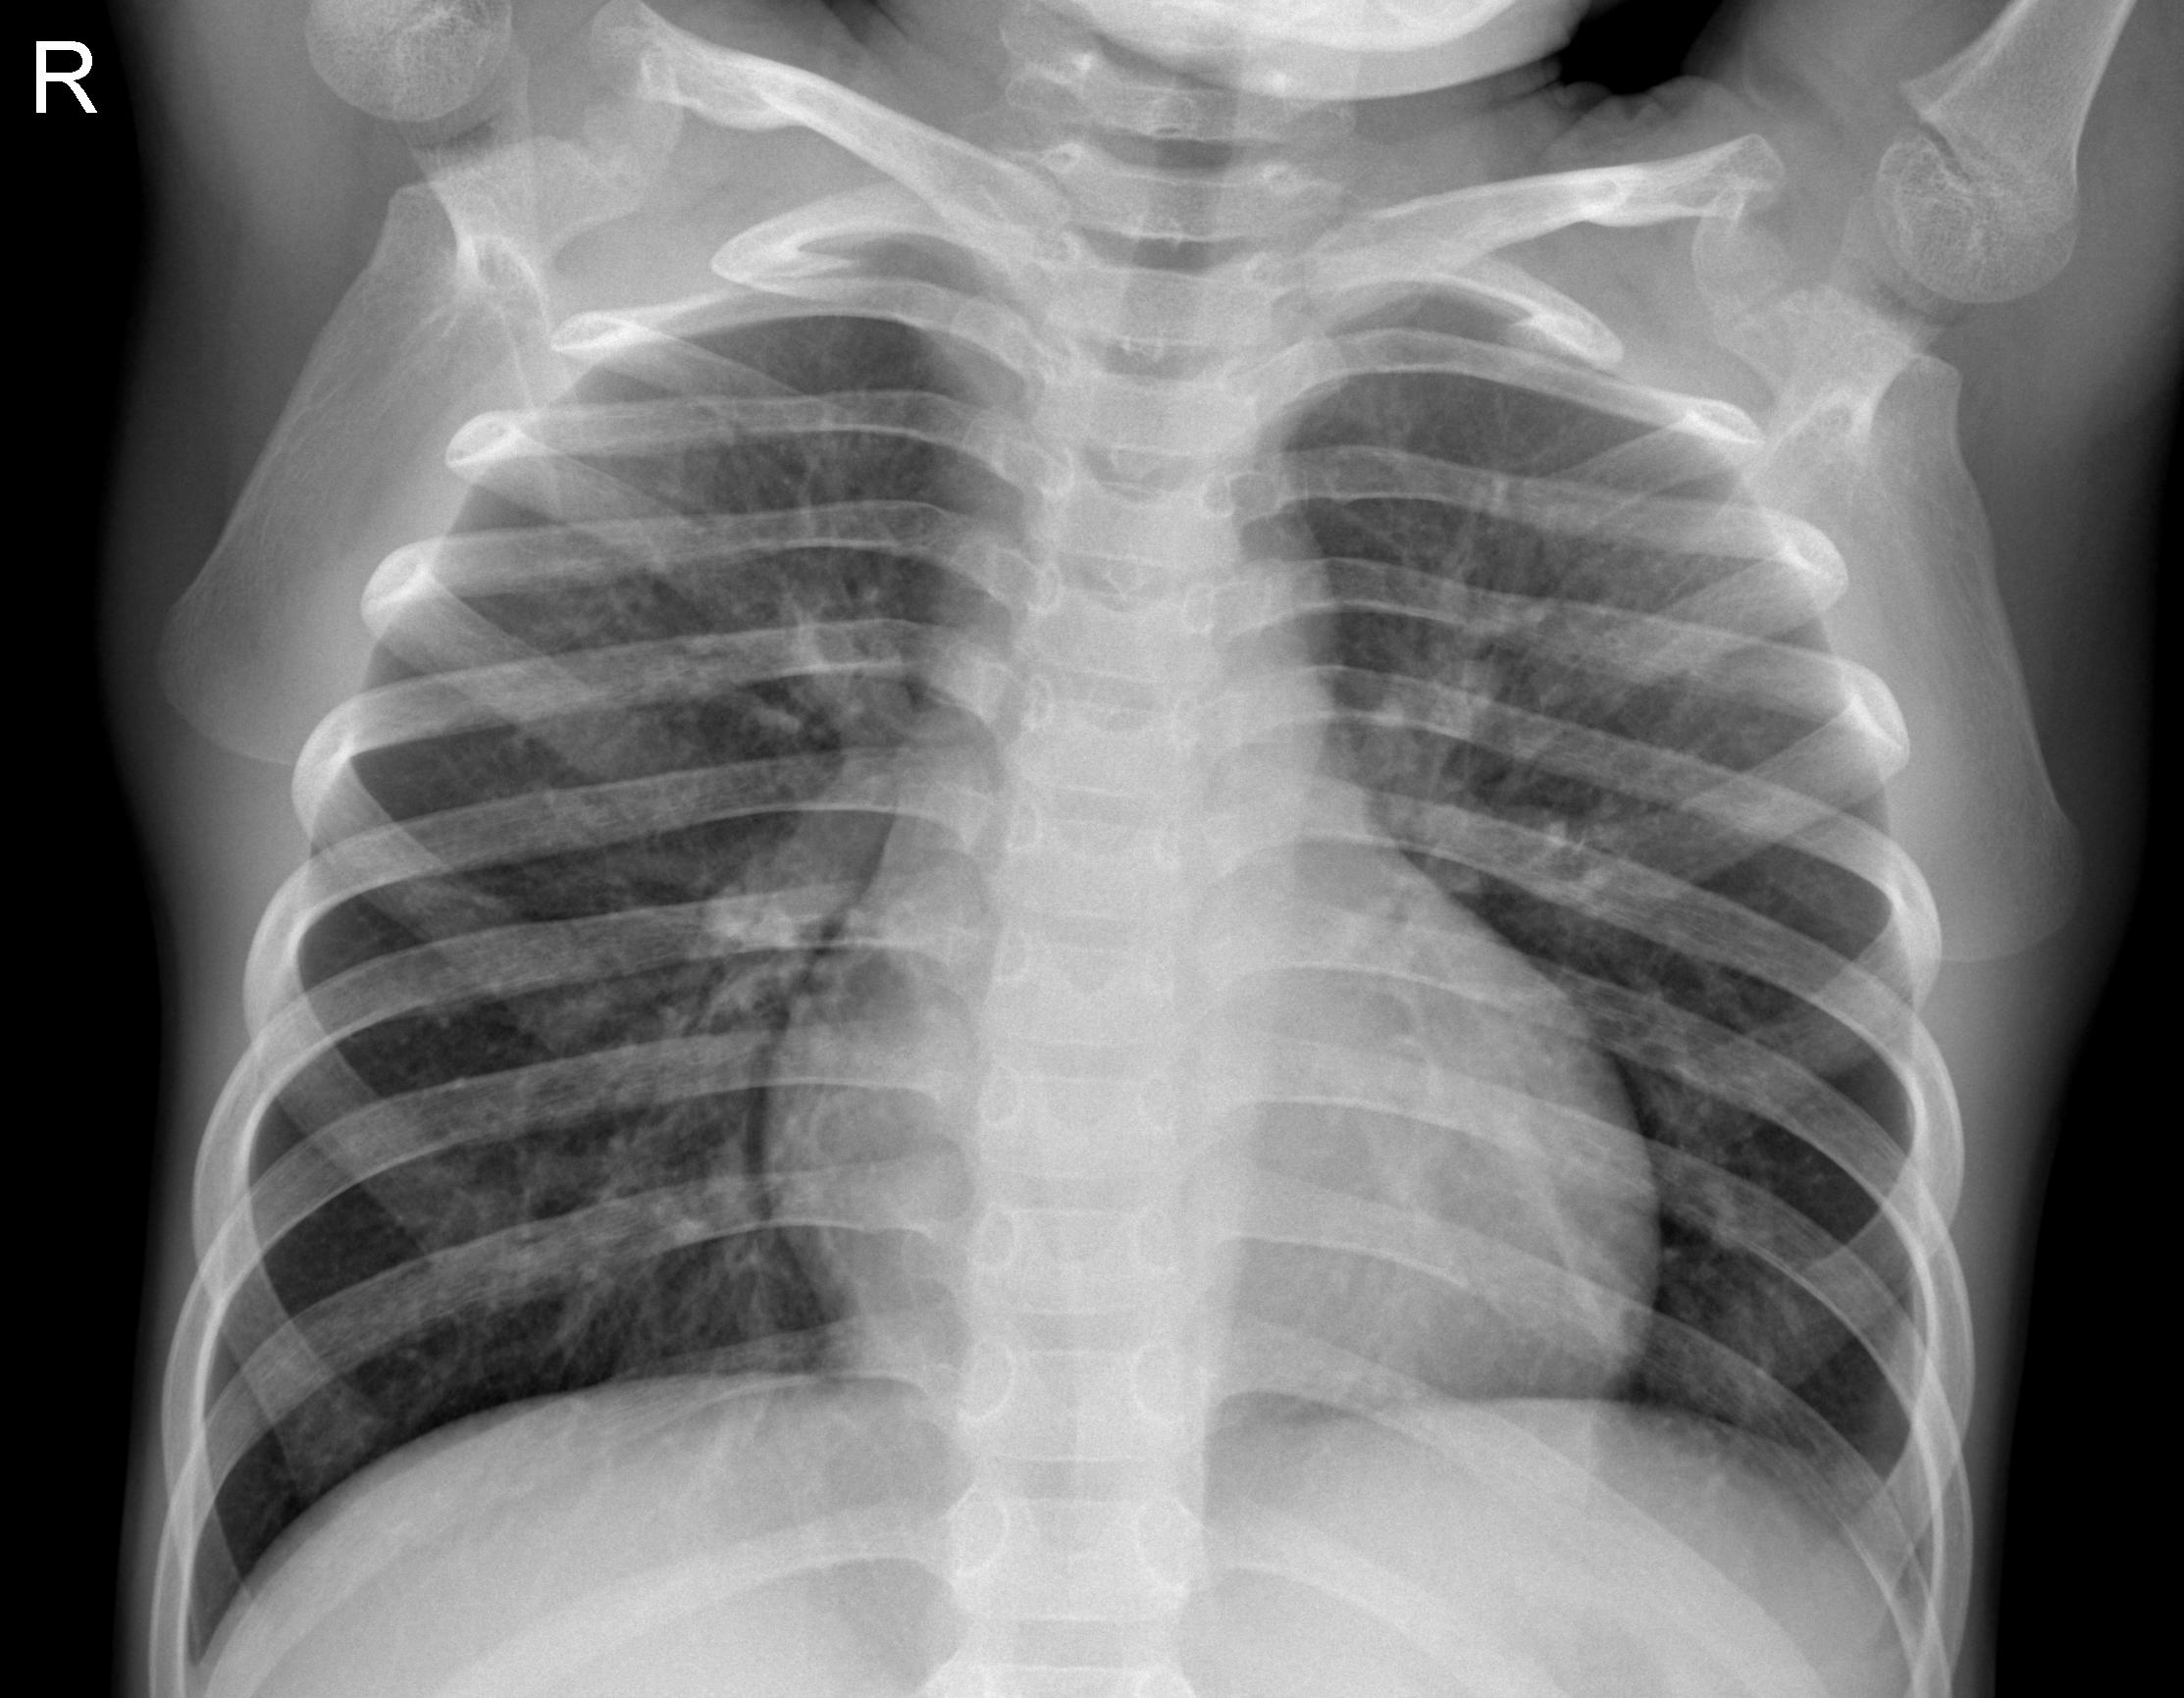

In [14]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f'Bashorat:{pred}')
print(f'Ehtimollik: {probs[pred_id]*100:.1f}%')
img